In [10]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import os
import mahotas
import scipy.signal



In [2]:
# this function does the the adoptive mean thresholding to create a binary image
# this is not automatic will need to change if resolution chenges

def adaptive_thresholding(use_blur=False, mean=True, blockSize=11, C=5):
    if mean:
        
        if use_blur == False:  # this is most used case
            mean_img = cv2.adaptiveThreshold(image_grey_scale,
                                              255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                              cv2.THRESH_BINARY, blockSize, C)

            return mean_img

        else:  # this is the second most used case
            mean_blurred_img = cv2.adaptiveThreshold(blurred,
                                            255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                            cv2.THRESH_BINARY, blockSize, C)

            return mean_blurred_img

    else:
        
        if use_blur:
            blurred_img = cv2.adaptiveThreshold(blurred,
                                              255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                              cv2.THRESH_BINARY, blockSize, C)
            return blurred_img

        else:
            img_without_blur_and_mean = cv2.adaptiveThreshold(image_grey_scale,
                                            255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY, blockSize, C)
            return img_without_blur_and_mean 


In [4]:
# this function is to plot single output or image
def Plot(Input, size, Title, extent, grey_scale_plot = True, plot_actual_location_in_card = True):
    
    fig, ax = plt.subplots(figsize=(size,size))  
    plt.title(Title)
    if grey_scale_plot == True:
        if plot_actual_location_in_card == True:
            ax.imshow(Input,'gray', extent = extent)
        else:
            ax.imshow(Input,'gray')
    else:
        if plot_actual_location_in_card ==True:
            ax.imshow(Input, extent = extent) 
        else:
            ax.imshow(Input)
        
    plt.show()

# Multiplots is a function to plot multiple images in one figure
def MultiPlots(Input,  rows, cols, size, Extent, Titles ):
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(size, size))
    for axis, i, k, e in zip (ax.flatten(), Input, Titles, Extent):
        axis.set(title = k )
        axis.imshow(i,'gray', extent = e)
    
    

In [5]:
# Mark is function to mark key words:
def Mark(Input):
    #1.1 getting the rectangle points:
    global pt_x_for_sex, pt_y_for_sex, pt_x_for_RH, pt_y_for_RH
    pt_x_for_sex = int(0.366 * Input.shape[1]) # x coordinates of the center of the marked rectangle
    pt_y_for_sex = int(0.86 * Input.shape[0]) # y coordinates of the center of the marked rectangle
    pt_x_for_RH = int(0.6 * Input.shape[1]) # x coordinates of the center of the marked rectangle
    pt_y_for_RH = int(0.861 * Input.shape[0]) # y coordinates of the center of the marked rectangle
    # marking the word:
    Input[pt_y_for_sex - 10 : pt_y_for_sex + 10, pt_x_for_sex - 10 : pt_x_for_sex + 10] = [255, 0, 0]
    Input[pt_y_for_RH - 10 : pt_y_for_RH + 10, pt_x_for_RH - 10 : pt_x_for_RH + 10] = [255, 0, 0]

In [6]:
# count_of_blpx is a function to black pixels number in each row or column:
def count_of_blpx(image, L, COL = True):
    if COL == True: #black pixels in each column
        for y in range(np.asarray(image).shape[1]):         #height       
            Temp02=0
            for x in range(np.asarray(image).shape[0]):     #width
                if np.asarray(image)[x,y] == 0:
                    Temp02 = Temp02 + 1     #counting no. of black pixels in each row
                
            L.append(Temp02)  
    else: #black pixels in each row
        for y in range(np.asarray(image ).shape[0]):         #height       
            Temp03 = 0
            for x in range(np.asarray(image).shape[1]):     #width
                if image[y,x] == 0:
                    Temp03 = Temp03 + 1     #counting no. of black pixels in each row
                
            L.append(Temp03)  



In [7]:
# Hist is a function to plot the histograms using the blpx_in_each_col list:
def Hist(Input, blpx, vertical = True):
    if vertical == True: # to plot vertical histogram: vertical histogram is a vertical line mouving away the x axis
        height = np.asarray(Input).shape[0]
        width = np.max(blpx)    
        for col in range(np.asarray(Input).shape[1]):       #for each row in input image draw a white line
            row = int(blpx[col])
            cv2.line(Input, (col,0), (col,height-row), (255,255,255), 1)   #this command is for ploting the histograms
            
            
    else:   #to plot horizental hist using blx_in_each_row list: horizontal histogram is a horizontal line mouving away the y axis
        height = np.asarray(Input).shape[0]
        width = np.asarray(Input).shape[1] 
        for row in range(np.asarray(Input).shape[0]):       #for each row in input image draw a white line
            col = int(blpx[row])
            cv2.line(Input, (255,row), (col,row), (255,255,255), 1) #this command is for ploting the histograms
    return Input

In [11]:
outpath1 = 'data4/'


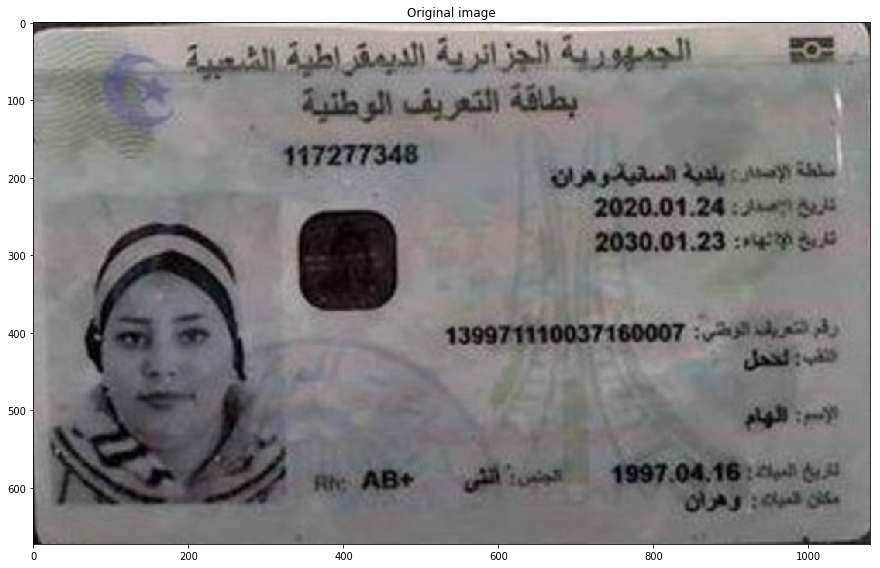

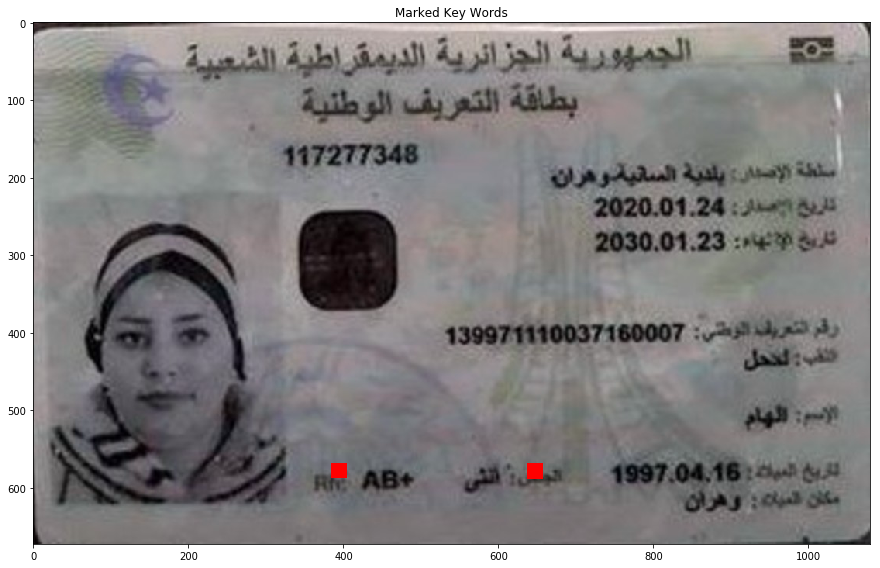

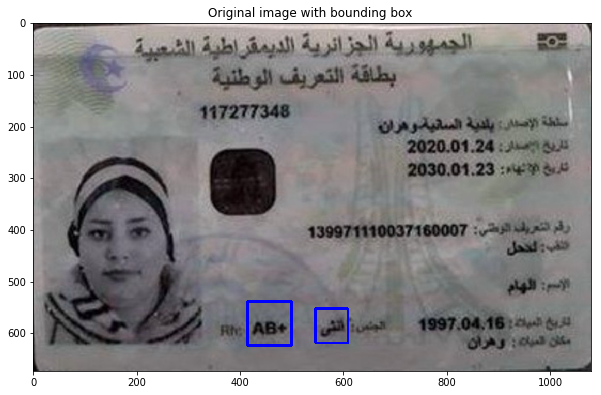

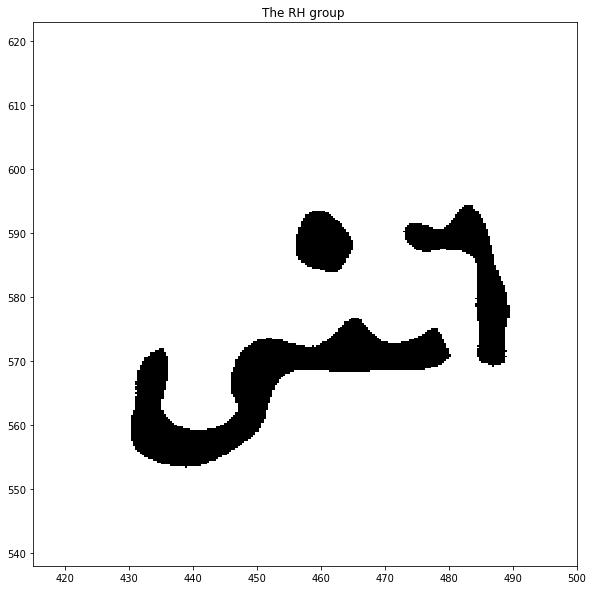

number of peaks fo ID is:  5 
 
 Peaks are: [ 58  99 138 181 205]

 Sex of this person is: انثى


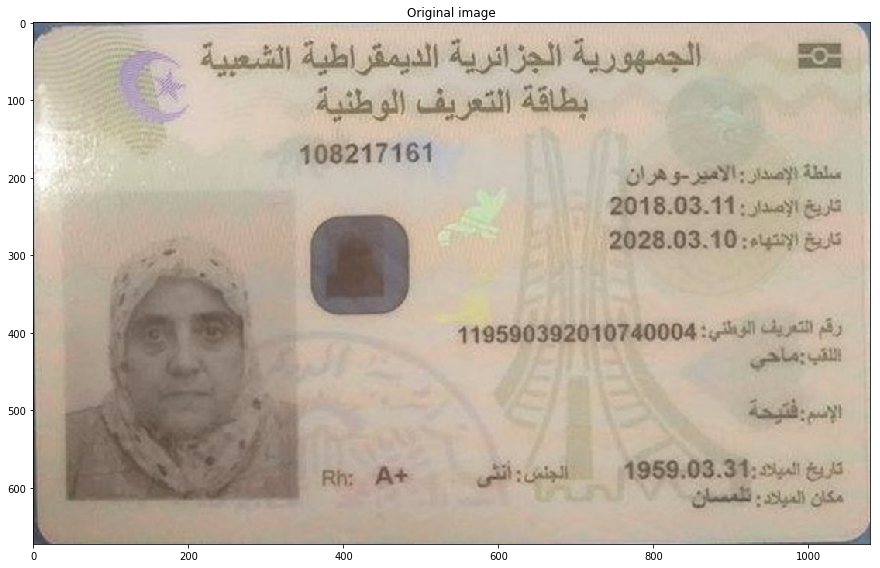

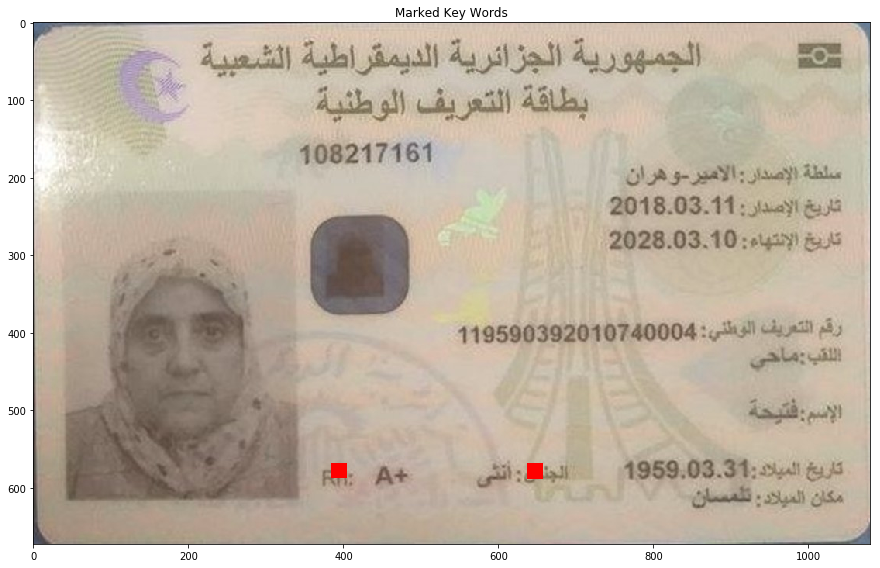

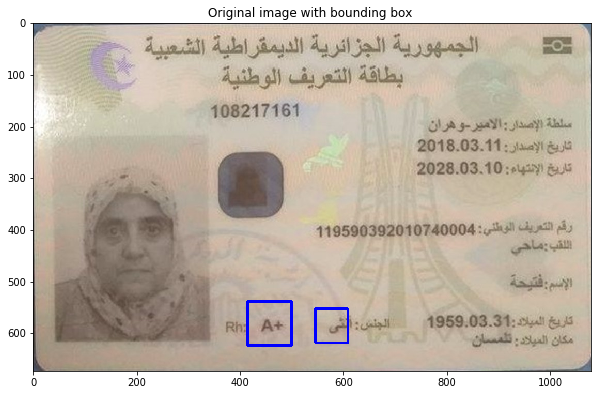

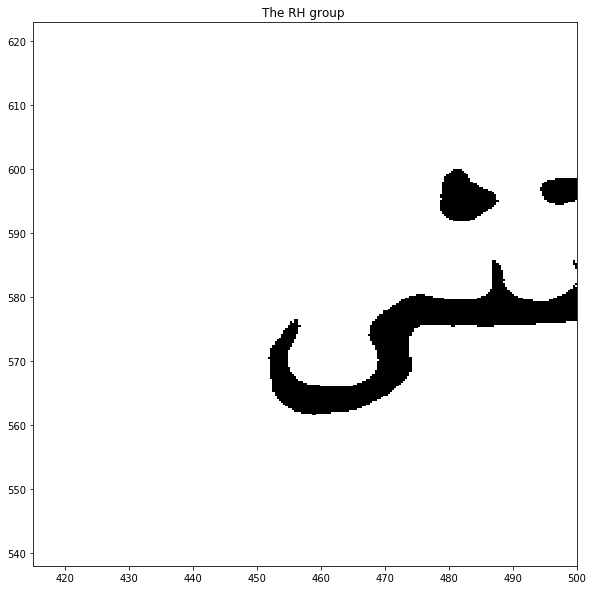

number of peaks fo ID is:  5 
 
 Peaks are: [116 163 193 211 248]

 Sex of this person is: انثى


In [14]:
number_of_id_cards = 0   # to get the number if id cards



for img in os.listdir(outpath1):
    original_image = cv2.imread(outpath1 + img)   # uploading the images

    Plot(original_image, 15, 'Original image', [] ,grey_scale_plot = False ,plot_actual_location_in_card = False)
    number_of_id_cards = number_of_id_cards + 1
    
    width, height = 250, 300        #fixing the height and the width of the image
    
    # the coordinates of key words:


    # for marking the key words :
    a1 = int(0.3845 * original_image.shape[1])
    b1 = int(0.8 * original_image.shape[0])
    c1 = int(0.4637 * original_image.shape[1])
    d1 = int(0.926 * original_image.shape[0])
    
    #for sex : 
    a2 = int(0.5064 * original_image.shape[1])
    b2 = int(0.8206 * original_image.shape[0])
    c2 = int(0.5648 * original_image.shape[1])
    d2 = int(0.9196 * original_image.shape[0]) 
    
    width, height = 250, 300          #fixing the height and the width of the image
    
    #first point to trace the rectangle for RH ans sex :
    pts1 = np.float32([[a1, b1], [c1, b1], [a1, d1], [c1, d1]])
    pts2 = np.float32([[a2, b2], [c2, b2], [a2, d2], [c2, d2]])
    
    #second point to trace the rectangle for RH and sex:
    pts3 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
    
    #extracting the two rectangles:
    matrix1 = cv2.getPerspectiveTransform(pts1, pts3)
    matrix2 = cv2.getPerspectiveTransform(pts2, pts3)
    
    image_of_Sex = cv2.warpPerspective(original_image, matrix2, (width, height)) 
    
    
    #identifying RH and sex key words:

    marked_image = original_image.copy()
    n = int(0.366*marked_image.shape[1])
    m = int(0.86*marked_image.shape[0])
    n1 = int(0.6*marked_image.shape[1])
    m1 = int(0.861*marked_image.shape[0])
    
   #identifying RH and sex key words:

    marked_image = original_image.copy()
    Mark(marked_image)
    Plot(marked_image, 15, 'Marked Key Words', [] ,grey_scale_plot = False ,plot_actual_location_in_card = False)    
    
    
    
    # Plot of the image with rectangles :
    image_with_bb = original_image.copy()
    color = (0,0,255)
    cv2.rectangle(image_with_bb, (a1, b1), (c1, d1), color,4)
    cv2.rectangle(image_with_bb, (a2, b2), (c2, d2), color,4)
    Plot(image_with_bb, 10, 'Original image with bounding box ', [],  grey_scale_plot = False , plot_actual_location_in_card = False)
    

    

    



    #grey scale
    image_grey_scale = cv2.cvtColor(image_of_Sex, cv2.cv2.COLOR_BGR2GRAY)
    
    # deleting noise : 
    
    # dilation :
    kernel = np.ones((5,5), np.uint8) 
    img_dilation = cv2.dilate(image_grey_scale, kernel, iterations=1)
    #bilateral filter :
    blurred = cv2.bilateralFilter(img_dilation, 10, 31, 31)
    #adabtive mean thresholding:
    binary_img = adaptive_thresholding(mean=True,
                                            use_blur=True, blockSize =55, C=15)
    extent2 = [a1, c1, b1, d1]
    Plot(binary_img, 10, 'The RH group ', extent2,  grey_scale_plot = True , plot_actual_location_in_card = True)

    #histograms:
    
    # vertical histogram: we don't need horizental histogram

    blpx_in_each_col = []
    count_of_blpx(binary_img ,blpx_in_each_col, True)
    vert_hist = np.zeros([np.asarray(binary_img).shape[0],np.asarray(binary_img).shape[1]])  #img_vertical_hist
    Hist(vert_hist, blpx_in_each_col, True)
    
    
    # finding number of peaks (with height 35px and distance between each one 18px)
    indexes, _ = scipy.signal.find_peaks(blpx_in_each_col, height=35, distance=18)
    print('number of peaks fo ID is: ',len(indexes)  ,'\n \n Peaks are: %s' % (indexes))
    
    if (len(indexes) <=3 ):
        print('\n Sex of this person is: ذكر ')
    else: 
        print('\n Sex of this person is: انثى')
    
    
    if number_of_id_cards >= 2:
        break
    



    